In [1]:
from scipy.interpolate import lagrange
from scipy.interpolate import CubicSpline
from numpy.polynomial.polynomial import Polynomial 

import matplotlib.pyplot as plt
import numpy as np
import time
import inspect

### Plot Cubic Spline and Lagrange Polynomial
as well as measuring and printing calculation speed

Spline Time: 0.0
Lagrange Time: 0.0034317970275878906


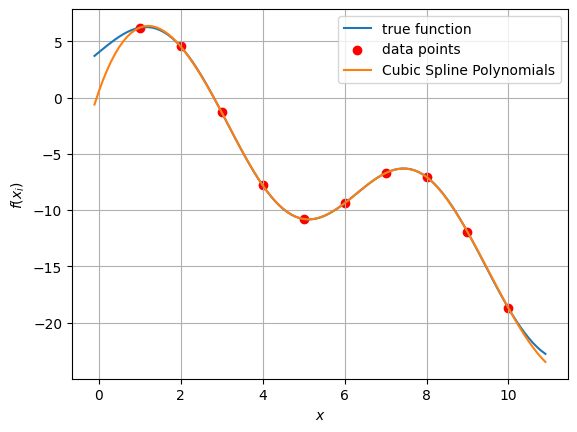

In [2]:
def test_spline_against_lagrange(n, f):
    """Prints the runtime of the lagrange and cubic spline interpolation calculation for the function f with n points."""
    x = [float(i) for i in range(1,n+1)]
    y = [f(t) for t in list(x)]

    start_cs = time.time()
    cubicspline_polynomial = CubicSpline(x, y)
    print("Spline Time:", time.time()-start_cs)

    start_l = time.time()
    lagrange_polynomial = lagrange(x, y)
    print("Lagrange Time:", time.time()-start_l)

    x_new = np.arange(-.1, n+1, 0.1)
    plt.plot(x_new, [f(x) for x in x_new], label="true function")
    plt.scatter(x, y, label='data points', c="r")
    #plt.plot(x_new, Polynomial(lagrange_polynomial.coef[::-1])(x_new), label='Lagrange Polynomial')  #utilizes and prints polynmial
    plt.plot(x_new, cubicspline_polynomial(x_new), label='Cubic Spline Polynomials')  #utilizes and prints polynmial

    plt.grid()
    plt.ylabel("$f(x_i)$")
    plt.xlabel("$x$")
    plt.legend()
    plt.show()

    return

test_spline_against_lagrange(10,f = lambda x: 5*np.sin(x)+4.0-2.0*x)

### Compare Calulcation of Cubic Spline and Lagrange Polynomial over different functions and number of datapoints

In [3]:
def runtime(n=20,function=lambda x: np.sin(x**(1.1)/5)):
    #n= number of points

    x = np.arange(-1*n / 2,n/2,1)
    y = function(x)

    start_cs = time.time()
    cubicspline_polynomial = CubicSpline(x, y)
    time_cs = time.time()-start_cs

    start_l = time.time()
    lagrange_polynomial = lagrange(x, y)
    time_l = time.time()-start_l
    return (time_cs, time_l)


In [4]:
def plot_function_spline_time(f):
    nr_points = [5, 20,50,100, 300, 500]  #,700] #,1000]
    times_raw = [runtime(n, f) for n in nr_points]
    print("times_raw: ", times_raw)
    times = [(cs, l) for cs, l in times_raw ]
    spline_times = [cs for cs, l in times]
    lagrange_times = [l for cs, l in times]

    plt.semilogx(nr_points, spline_times, label = "Cubic Splines")
    plt.semilogx(nr_points, lagrange_times, label = "Lagrange Polynomial")
    plt.ylabel("calulation time in seconds")
    plt.xlabel("Nr of Interpolation Points")
    plt.title("Comparison Runtime of interpolation technique")
    plt.grid(True)
    plt.legend()
    plt.show()


times_raw:  [(0.0, 0.0), (0.006276607513427734, 0.03531670570373535), (0.0, 0.17412543296813965), (0.0, 0.9620118141174316), (0.002192974090576172, 4.452831745147705), (0.0, 11.306339502334595)]


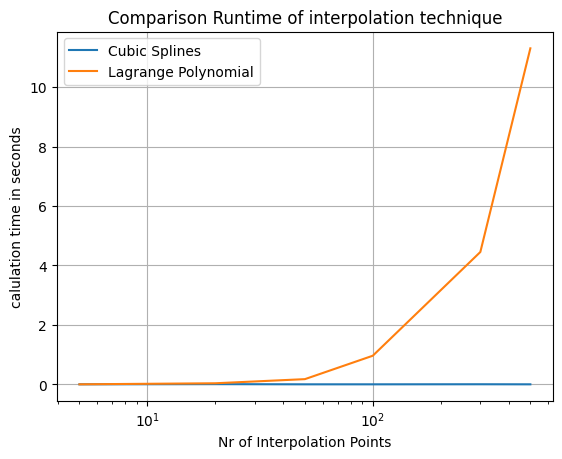

In [5]:
plot_function_spline_time(lambda x: 5*np.sin(x)+4.0-2.0*x)

times_raw:  [(0.0010704994201660156, 0.0021142959594726562), (0.0, 0.03756093978881836), (0.0, 0.1508939266204834), (0.0, 0.5039896965026855), (0.011037349700927734, 4.502761602401733), (0.0, 21.013951301574707)]


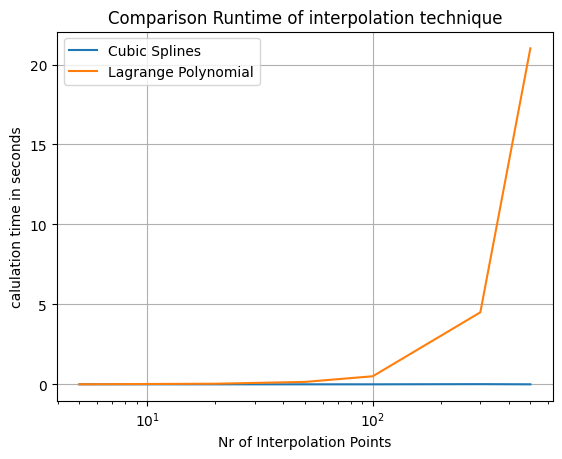

In [6]:
plot_function_spline_time(lambda x: x**6-3*(x**4)+7.2*x+0.3)

### Calculate only runtime for Cubic Spline

In [7]:
def runtime_s(n=20,function=lambda x: np.sin(x**(1.1)/5)):
    #n= number of points

    x = np.arange(-1*n / 2,n/2,1)
    y = function(x)

    start_cs = time.time()
    cubicspline_polynomial = CubicSpline(x, y)
    return time.time()-start_cs

In [8]:
def plot_st(f):
    nr_points = [10**i for i in range(1,8)]
    spline_times = [runtime_s(n, f) for n in nr_points]

    plt.semilogx(nr_points, spline_times, label = "Cubic Splines")
    plt.ylabel("calulation time in seconds")
    plt.xlabel("Nr of Interpolation Points")
    plt.title("Runtime of spline interpolation technique")
    plt.grid(True)
    plt.legend()
    plt.show()

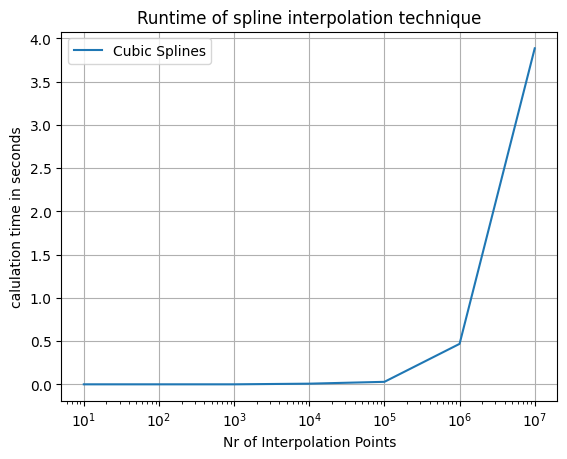

In [9]:
plot_st(lambda x: 5*np.sin(x)+4.0-2.0*x)